# Differential Equations in Python

## Concentration of a Solution in a Lake

A chemical company pumps $v$ liters of solution containing mass $m$ grams of solute into a large lake of volume $V$ per day. 
The inflow and outflow of the water are constant. The concentration of solute in the lake, say, $\sigma$, satisfies the differential equation
$$
\frac{d\sigma}{dt} + \frac{v}{V}\sigma = \frac{m}{V}
$$

**Determine the concentration of the solute in the lake at time $t$ assuming that $\sigma=0$ when $t=0$.**

### Solution
Since the differential equation is of the form 
$$\frac{dx}{dt} + xP(t) = Q(t)$$
then we can solve for $\sigma$ by multiplying the original equation by the integrating factor 
$$
J(t) = \exp\Bigl(\int{P(t)dt}\Bigr)
$$

For our example, the integrating factor is givin by
$$
J(t) = \exp\bigl(\frac{vt}{V}\bigr)
$$
Multiplying the original equation by $J(t)$ and then integrating yields
$$
\sigma(t) = \frac{m}{V}-c\cdot\exp\bigl(-\frac{vt}{V}\bigr)
$$

Using the initial conditions, we get that $C=\frac{m}{V}$, which means that 
$$
\sigma(t) = \frac{m}{V}\Bigl(1-\exp\bigl(-\frac{vt}{V}\bigr)\Bigr)
$$

And as $t\rightarrow \infty$, the concentration approaches $\frac{m}{V}$ $(g/L)$

### Using Python 

In [1]:
from sympy import dsolve, Eq, Function, symbols, pprint, simplify, evalf

In [2]:
t = symbols('t')
v = symbols('v')
m = symbols('m')
V = symbols('V')
sigma= symbols(r'sigma', cls=Function)

In [3]:
# Differential equation
eqn = Eq(sigma(t).diff(t) + (v/V)*sigma(t), m/V)

# Initial Conditions
ics={sigma(0):0}

# Solution to differential equation
sol = simplify(dsolve(eqn, sigma(t), ics=ics))

pprint(sol)

         ⎛     -t⋅v ⎞
         ⎜     ─────⎟
         ⎜       V  ⎟
       m⋅⎝1 - ℯ     ⎠
σ(t) = ──────────────
             v       


In [4]:
sol.subs(t,0)
sol.subs(t,1)

Eq(sigma(1), m*(1 - exp(-v/V))/v)

This agrees with the results which we calculated analytically. Now using matplotlib we can visualize the behavior of the solution

In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

mpl.style.use('fivethirtyeight')

In [26]:
m_sol= 1
v_sol = 2
Volume = 100
t = np.linspace(0,800,5000)

In [27]:
def solution(t):
    X = (m_sol/Volume) * (1-np.exp(-(v_sol/Volume)*t))
    return X

In [28]:
X = np.array([solution(s) for s in t])

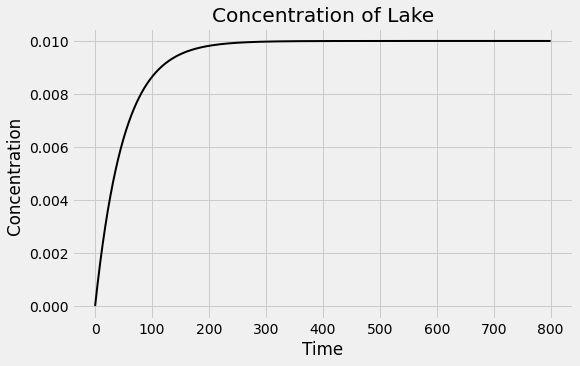

In [30]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(t, X,'k',lw=2)
ax.set_xlabel('Time')
ax.set_ylabel('Concentration ')
ax.set_title('Concentration of Lake')
plt.show()